In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2000-01-01'
end = '2020-12-31'

# Tickers of assets
assets = """AXISBANK.NS	BPCL.NS	BRITANNIA.NS	CIPLA.NS	DRREDDY.NS	EICHERMOT.NS	GAIL.NS	HDFCBANK.NS	HINDALCO.NS	HINDUNILVR.NS	INFY.NS	IOC.NS	ITC.NS	M&M.NS	MARICO.NS	ONGC.NS	RELIANCE.NS	SAIL.NS	SBIN.NS	SIEMENS.NS	SUNPHARMA.NS	TATACONSUM.NS	TATAMOTORS.NS	TATAPOWER.NS	TATASTEEL.NS	TITAN.NS VEDL.NS	WIPRO.NS""".split()
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%***********************]  28 of 28 completed


In [2]:
# Calculating returns

Y = data[assets].pct_change().dropna()

display(Y.head())

,AXISBANK.NS,BPCL.NS,BRITANNIA.NS,CIPLA.NS,DRREDDY.NS,EICHERMOT.NS,GAIL.NS,HDFCBANK.NS,HINDALCO.NS,HINDUNILVR.NS,...,SBIN.NS,SIEMENS.NS,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATAPOWER.NS,TATASTEEL.NS,TITAN.NS,VEDL.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-04,3.8610%,-7.2010%,-0.3105%,0.5421%,8.0027%,5.2200%,-3.4207%,2.2353%,3.7927%,-1.1484%,...,6.3411%,0.2936%,-1.3406%,-2.4092%,-3.9446%,0.1954%,-1.0823%,-5.3308%,-1.4181%,8.0005%
2000-01-05,-2.6022%,-2.8475%,-2.5512%,-2.0611%,-3.7386%,8.0739%,-4.7476%,-3.9413%,7.9969%,-3.5576%,...,-4.1104%,-4.4003%,-3.5102%,-4.1659%,2.4255%,1.9506%,3.8130%,-6.1058%,-0.6103%,1.6298%
2000-01-06,-2.4809%,5.6535%,6.8476%,-5.5190%,5.9628%,8.0108%,2.7690%,0.8086%,7.8264%,4.0139%,...,5.0513%,1.4354%,-0.0973%,3.3432%,4.1501%,3.1250%,7.4736%,8.0203%,4.6491%,-1.9347%
2000-01-07,-4.8924%,-0.1183%,7.9998%,-7.9876%,-7.9715%,7.7500%,-3.5412%,0.0297%,4.4351%,5.4519%,...,4.7127%,-7.9622%,-7.9991%,7.9728%,8.0144%,-0.1855%,2.1991%,-2.1070%,-2.3470%,-7.9989%
2000-01-10,3.0864%,1.3427%,7.5074%,-3.3385%,-1.6480%,1.3148%,-0.5587%,-1.4553%,-6.5802%,0.7584%,...,-1.3904%,-1.8246%,-4.5933%,0.8827%,7.8992%,7.0012%,5.9901%,-0.9908%,2.1459%,0.1353%


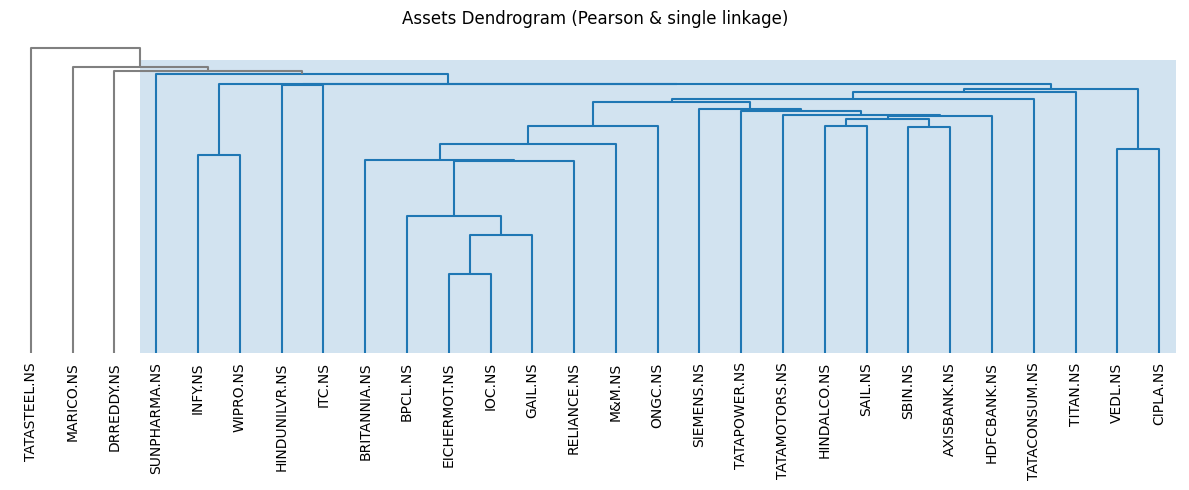

In [3]:
import riskfolio as rp

# Plotting Assets Clusters

ax = rp.plot_dendrogram(returns=Y,
                        codependence='pearson',
                        linkage='single',
                        k=None,
                        max_k=10,
                        leaf_order=True,
                        ax=None)

In [4]:
# Building the portfolio object
port = rp.HCPortfolio(returns=Y)

# Estimate optimal portfolio:

model='HRP' # Could be HRP or HERC
codependence = 'pearson' # Correlation matrix used to group assets in clusters
rm = 'MV' # Risk measure used, this time will be variance
rf = 0 # Risk free rate
linkage = 'single' # Linkage method used to build clusters
max_k = 10 # Max number of clusters used in two difference gap statistic, only for HERC model
leaf_order = True # Consider optimal order of leafs in dendrogram

w = port.optimization(model=model,
                      codependence=codependence,
                      rm=rm,
                      rf=rf,
                      linkage=linkage,
                      max_k=max_k,
                      leaf_order=leaf_order)

display(w.T)

,AXISBANK.NS,BPCL.NS,BRITANNIA.NS,CIPLA.NS,DRREDDY.NS,EICHERMOT.NS,GAIL.NS,HDFCBANK.NS,HINDALCO.NS,HINDUNILVR.NS,...,SBIN.NS,SIEMENS.NS,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATAPOWER.NS,TATASTEEL.NS,TITAN.NS,VEDL.NS,WIPRO.NS
weights,2.2537%,1.5172%,4.4297%,0.0261%,6.8082%,0.0914%,0.9288%,4.4682%,2.0421%,8.4102%,...,4.6370%,3.4394%,6.1077%,4.9613%,1.9933%,2.5575%,0.1876%,3.0778%,1.3223%,4.1511%


### 2.2 Plotting portfolio composition

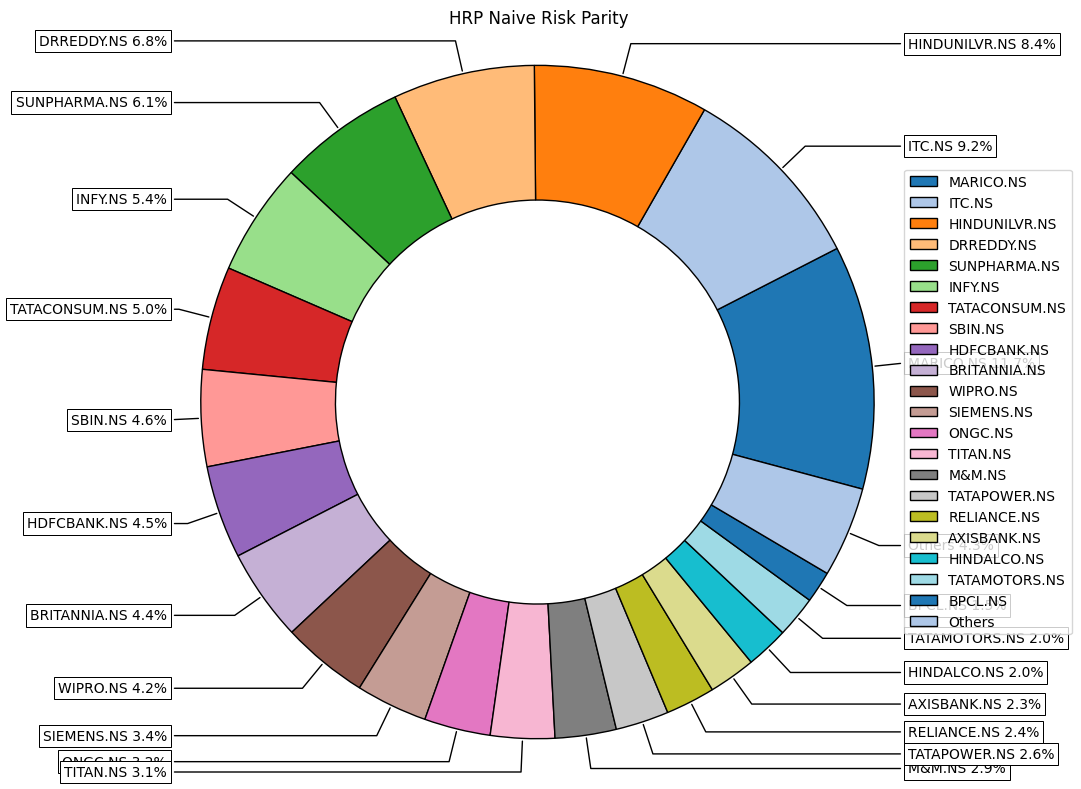

In [5]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w,
                 title='HRP Naive Risk Parity',
                 others=0.05,
                 nrow=25,
                 cmap="tab20",
                 height=8,
                 width=10,
                 ax=None)

### 2.3 Plotting Risk Contribution

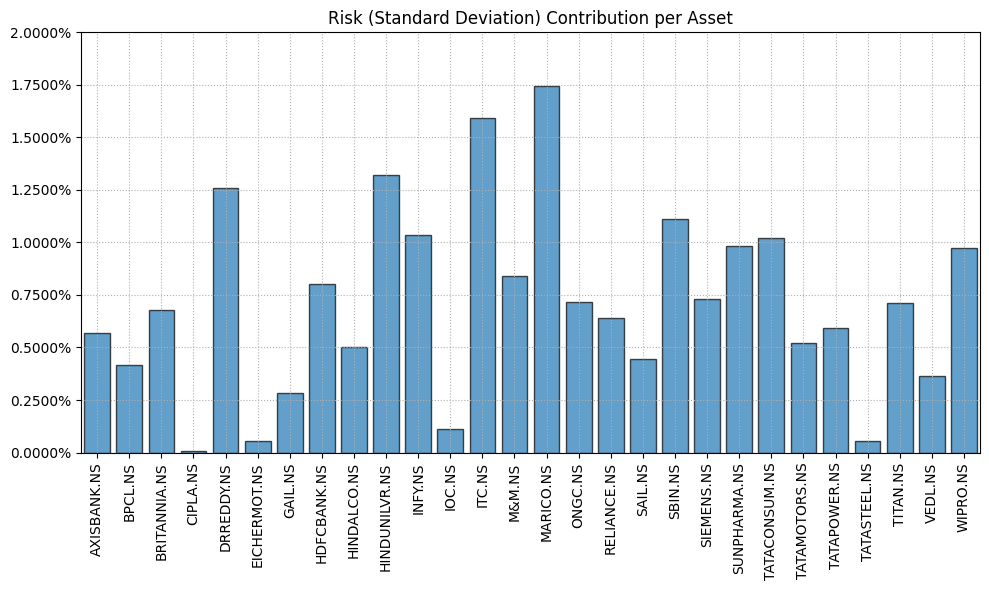

In [6]:
# Plotting the risk contribution per asset

mu = Y.mean()
cov = Y.cov() # Covariance matrix
returns = Y # Returns of the assets

ax = rp.plot_risk_con(w=w,
                      cov=cov,
                      returns=returns,
                      rm=rm,
                      rf=0,
                      alpha=0.05,
                      color="tab:blue",
                      height=6,
                      width=10,
                      t_factor=252,
                      ax=None)

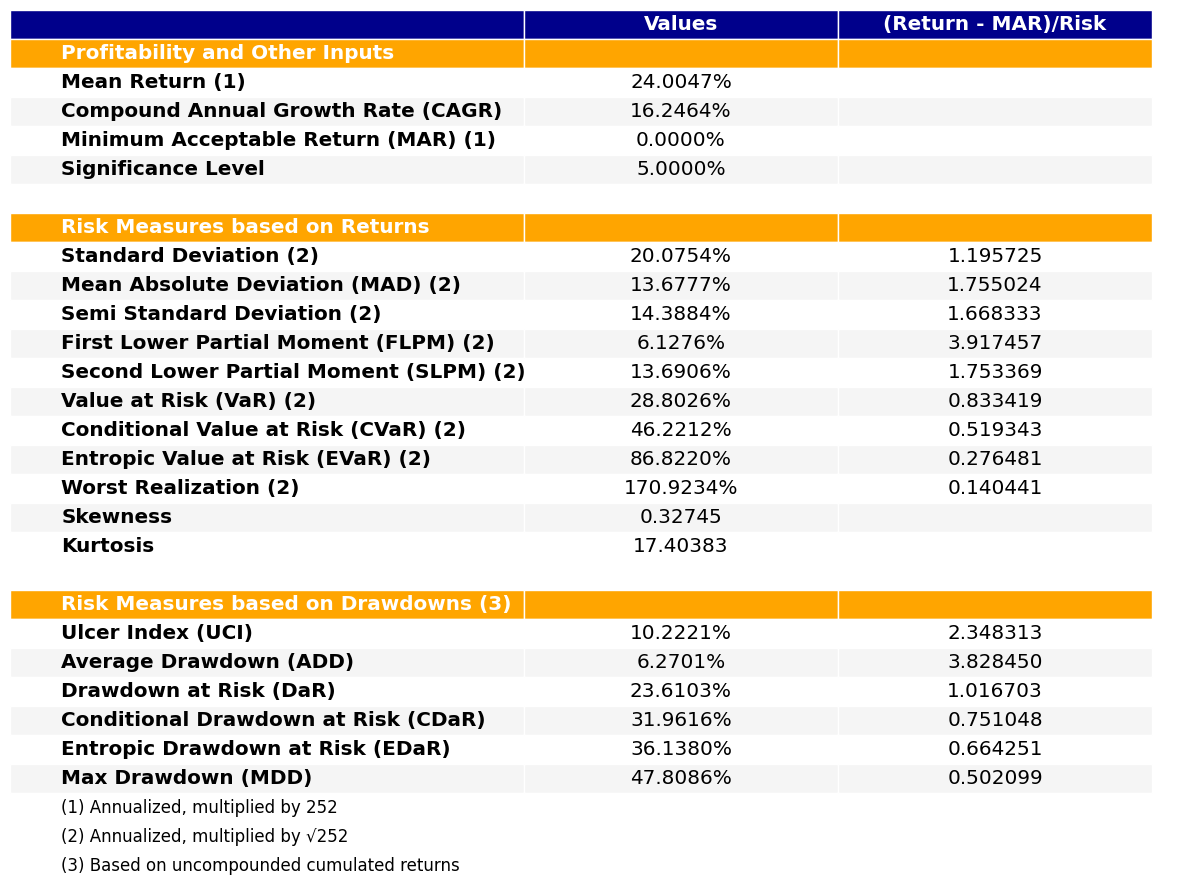

In [8]:
ax = rp.plot_table(returns=Y, w=w, MAR=0, alpha=0.05, ax=None)
